In [1]:
# importing necessary libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [5]:
# load the dataset
df=pd.read_csv('agricultural sustainability.csv')
df.head()


,soil_health,crop_yield,water_usage,carbon_footprint,fertilizer_use,sustainability
0,0.374540,6778.284815,964.057410,126.020778,226.809659,0
1,0.950714,1757.259685,4561.488080,175.365653,88.134761,0
2,0.731994,2454.658427,2773.635676,129.654718,194.072090,0
3,0.598658,9086.987697,4219.058597,89.916140,201.678762,0
4,0.156019,6457.861537,1940.223205,104.286142,156.032668,0


In [6]:
df.columns

Index(['soil_health', 'crop_yield', 'water_usage', 'carbon_footprint',
       'fertilizer_use', 'sustainability'],
      dtype='str')

In [7]:
# split the dataset :80:20 -Feature and target selection
x=df[['soil_health','crop_yield','water_usage','carbon_footprint','fertilizer_use']]
y=df['sustainability']

In [8]:
# spilt
x_train,x_test,y_train,y_test=train_test_split(
    x,y,train_size=0.8,random_state=42
)

In [9]:
print(f'{x_train.shape}')
print(f'{x_test.shape}')
print(f'{y_train.shape}')
print(f'{y_test.shape}')

(160, 5)
(40, 5)
(160,)
(40,)


In [10]:
# instantiate the model
model = RandomForestClassifier(n_estimators=100,random_state=42)

In [11]:
# train the model 
model.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [12]:
# predictions
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [13]:
# evaluation - metrics - acc|cm|cr
acc=accuracy_score(y_test,y_pred)
print(f'The accuracy score:{acc*100:2f}%')

The accuracy score:92.500000%


In [14]:
# confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[35,  0],
       [ 3,  2]])

In [15]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        35
           1       1.00      0.40      0.57         5

    accuracy                           0.93        40
   macro avg       0.96      0.70      0.77        40
weighted avg       0.93      0.93      0.91        40



In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [20]:
# load the dataset
data = pd.read_csv('environmental factors.csv')
data.head()

,temperature,humidity,wind_speed,carbon_emissions,solar_irradiance,pollution_level
0,22.490802,52.418449,19.599966,337.165056,369.020837,84.723658
1,34.014286,49.974726,8.690240,256.681604,185.335998,49.451704
2,29.639879,40.569235,11.932794,484.024336,213.723302,19.546561
3,26.973170,66.436000,18.265613,148.540303,262.604015,73.664179
4,18.120373,58.597450,14.641787,314.535387,283.288001,41.867814


In [21]:
# Normalize the features using standardaScaler
scaler = StandardScaler()
data_scaled=scaler.fit_transform(data)
# display scaled data
print(pd.DataFrame(data_scaled,columns=data.columns).head())

   temperature  humidity  wind_speed  carbon_emissions  solar_irradiance  \
0    -0.415900 -0.452465    0.801884          0.482494         -0.684316   
1     1.587377 -0.593258   -1.100359         -0.136414         -1.389866   
2     0.826917 -1.135149   -0.534981          1.611824         -1.280827   
3     0.363328  0.355146    0.569224         -0.968007         -1.093072   
4    -1.175669 -0.096466   -0.062635          0.308475         -1.013623   

   pollution_level  
0         1.193409  
1        -0.029923  
2        -1.067119  
3         0.809835  
4        -0.292954  


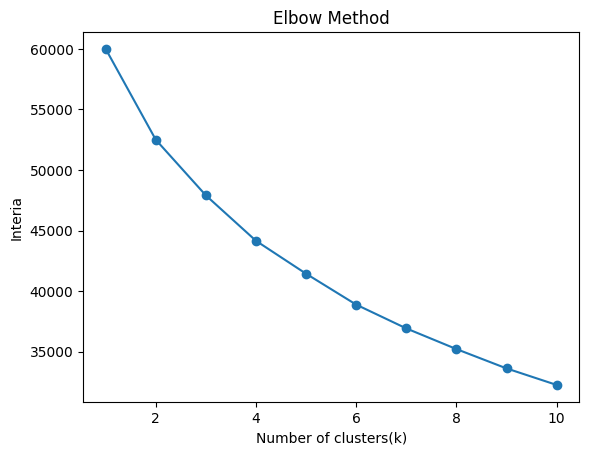

In [22]:
# use the Elbow method to find the optimal number of clusters
inertia=[]
k_range=range(1,11)

for k in k_range:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

    #plot the inertia values to find the "elbow"
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Interia')
plt.show()

In [23]:
# Applying k-Means clustering with k=7(as an example)
k=7
kmeans=KMeans(n_clusters=k,random_state=42)
data['cluster']=kmeans.fit_predict(data_scaled)

# display the first few rows with cluster labels
print(data.head())

   temperature   humidity  wind_speed  carbon_emissions  solar_irradiance  \
0    22.490802  52.418449   19.599966        337.165056        369.020837   
1    34.014286  49.974726    8.690240        256.681604        185.335998   
2    29.639879  40.569235   11.932794        484.024336        213.723302   
3    26.973170  66.436000   18.265613        148.540303        262.604015   
4    18.120373  58.597450   14.641787        314.535387        283.288001   

   pollution_level  cluster  
0        84.723658        6  
1        49.451704        5  
2        19.546561        6  
3        73.664179        4  
4        41.867814        6  


In [25]:
# calculate Silhouette Score
sil_score = silhouette_score(data_scaled,data['cluster'])
print(f'silhouette_score:{sil_score}')

silhouette_score:0.1220564614918148


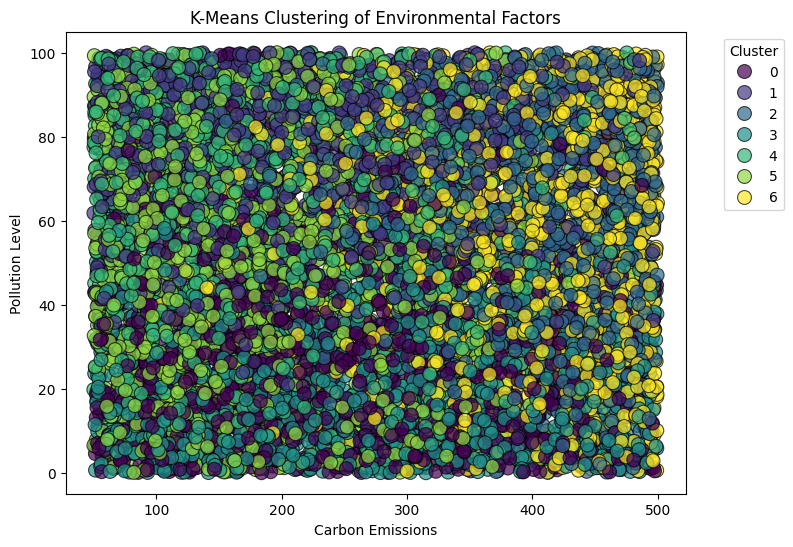

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming 'data' already contains the cluster labels (from the KMeans model)
# We'll use two features to plot:'carbon_emissions' and 'pollution_level'
plt.figure(figsize=(8,6))
# create a scatter plot with the cluster labels
sns.scatterplot(x='carbon_emissions',y='pollution_level',hue='cluster',data=data,palette='viridis',
                s=100,alpha=0.7,edgecolor='k')

# Title and labels
plt.title('K-Means Clustering of Environmental Factors')
plt.xlabel('Carbon Emissions')
plt.ylabel('Pollution Level')
plt.legend(title='Cluster',bbox_to_anchor=(1.05,1),loc='upper left')
# Display the plot
plt.show()